<a href="https://colab.research.google.com/github/Sumitmeharwade/ANN_classifiction/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sumitmeharwade/ANN_classifiction.git

Cloning into 'ANN_classifiction'...
remote: Enumerating objects: 3724, done.
remote: Counting objects: 100% (3724/3724), done.
remote: Compressing objects: 100% (3722/3722), done.
remote: Total 3724 (delta 1), reused 3723 (delta 0), pack-reused 0
Receiving objects: 100% (3724/3724), 61.38 MiB | 31.38 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Tensorflow is a open source platform, keras built using python will work on top of tensorflow
Keras is having some datasets

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = '/content/ANN_classifiction/MY_data/train'

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to be between 0 and 1
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Zoom transformations
    horizontal_flip=True        # Horizontal flips
)

# Use the flow_from_directory method to load and augment the data
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),     # Resize images to (224, 224)
    batch_size=batch_size,
    class_mode='categorical'    # Assumes a classification task with categorical labels
)

# Create a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the data generator
model.fit(train_generator, epochs=2)

Found 2301 images belonging to 10 classes.
Epoch 1/2
72/72 [==============================] - 183s 3s/step - loss: 5.7868 - accuracy: 0.2203
Epoch 2/2
72/72 [==============================] - 170s 2s/step - loss: 1.6889 - accuracy: 0.3672


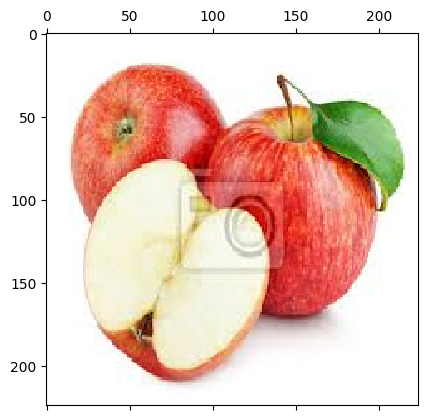

In [24]:

test_image_path = '/content/ANN_classifiction/MY_data/predict/0.jpeg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
plt.matshow(test_image)

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0


predictions = model.predict(test_image)

predicted_class = np.argmax(predictions)
class_indices = train_generator.class_indices


labels = dict((v, k) for k, v in class_indices.items())

predicted_label = labels[predicted_class]

print("predictions",predictions)

confidence = predictions[0][predicted_class]
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 62ms/step
predictions [[0.37918493 0.00595401 0.01668001 0.09197478 0.01881683 0.06127438
  0.01880904 0.01122717 0.20490538 0.19117346]]
Predicted Class: Apple
Confidence: 0.38


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = '/content/ANN_classifiction/data'

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to be between 0 and 1
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Zoom transformations
    horizontal_flip=True        # Horizontal flips
)

# Use the flow_from_directory method to load and augment the data
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),     # Resize images to (224, 224)
    batch_size=batch_size,
    class_mode='categorical'    # Assumes a classification task with categorical labels
)

# Create a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the data generator
model.fit(train_generator, epochs=2)

Found 451 images belonging to 2 classes.
Epoch 1/2
15/15 [==============================] - 36s 2s/step - loss: 21.0008 - accuracy: 0.5299
Epoch 2/2
15/15 [==============================] - 35s 2s/step - loss: 1.9878 - accuracy: 0.5211


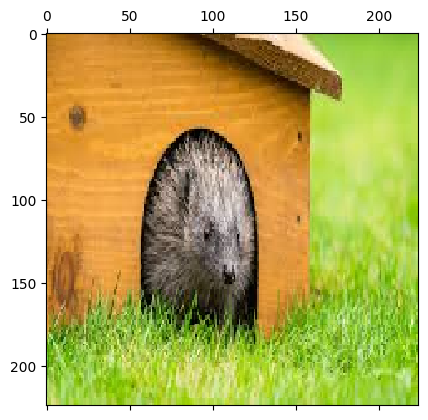

In [26]:

test_image_path = '/content/ANN_classifiction/data/hedgehogs/images228.jpg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
plt.matshow(test_image)

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0


predictions = model.predict(test_image)

predicted_class = np.argmax(predictions)
class_indices = train_generator.class_indices


labels = dict((v, k) for k, v in class_indices.items())

predicted_label = labels[predicted_class]

print("predictions",predictions)

confidence = predictions[0][predicted_class]
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 145ms/step
predictions [[9.9976212e-01 2.3793275e-04]]
Predicted Class: hedgehogs
Confidence: 1.00


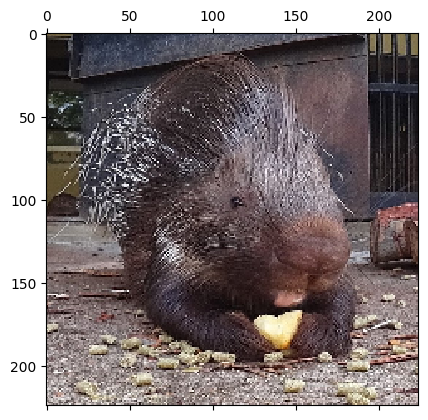

In [33]:

test_image_path = '/content/ANN_classifiction/data/porcupines/b375d78386d9d3b245600e9ee092e2cd.jpg'
test_image = image.load_img(test_image_path, target_size=(224, 224))
plt.matshow(test_image)

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0


predictions = model.predict(test_image)

predicted_class = np.argmax(predictions)
class_indices = train_generator.class_indices


labels = dict((v, k) for k, v in class_indices.items())

predicted_label = labels[predicted_class]

print("predictions",predictions)

confidence = predictions[0][predicted_class]
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")


1/1 [==============================] - 0s 55ms/step
predictions [[0.9573591  0.04264093]]
Predicted Class: hedgehogs
Confidence: 0.96
